In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 01. Data Load

In [2]:
# train 데이터 로드
X_train_border = pd.read_csv('Data/X_train_border.csv')
y_train_border = pd.read_csv('Data/y_train_border.csv')
X_train_enn = pd.read_csv('Data/X_train_enn.csv')
y_train_enn = pd.read_csv('Data/y_train_enn.csv')

# test 데이터 로드
X_test = pd.read_csv('Data/X_test.csv')
y_test = pd.read_csv('Data/y_test.csv')

# 02. GridsearchCV

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix, classification_report,roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## 02-1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression GridSearchCV

model = LogisticRegression()
params = {'C': [0.1, 1, 10, 100],
              'penalty': ['l2']}
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

grid_search = GridSearchCV(model,params,scoring = 'f1',cv=skf,n_jobs=-1)
grid_search.fit(X_train_border,y_train_border)
print('Best Hyper Parameter : {}'.format(grid_search.best_params_))

best = grid_search.best_estimator_
y_pred = best.predict(X_test)
y_prob = best.predict_proba(X_test)[:,1]
print('test ACC :', accuracy_score(y_pred, y_test))
print('test roc_auc : ',roc_auc_score(y_test, y_prob))
print('test f1_score : ',f1_score(y_pred,y_test))

## 02-2. XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(tree_method='gpu_hist', 
                      predictor = 'gpu_predictor') #gpu 설정

params = {'min_child_weight': [1, 5],
          'learning_rate': [0.01, 0.1, 1, 10],
          'max_depth': [2, 6, 10]}

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

grid_search = GridSearchCV(model, params, scoring = 'f1', cv=skf, n_jobs=None)
grid_search.fit(X_train_border,y_train_border)
print('Best score : {}'.format(grid_search.best_score_))
print('Best Hyper Parameter : {}'.format(grid_search.best_params_))

best = grid_search.best_estimator_
y_pred = best.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print('test ACC :', accuracy_score(y_pred, y_test))
print('test roc_auc : ',roc_auc_score(y_prob,y_test))
print('test f1_score : ',f1_score(y_pred,y_test))

## 02-3. CatBoost
- 학습 먼저 수행하고 GridSearchCV 수행

In [9]:
# 나머지 오버샘플링 데이터 로드
X_train_smote = pd.read_csv('./X_train_smote.csv')
X_train_adasyn = pd.read_csv('./X_train_adasyn.csv')
X_train_tomek = pd.read_csv('./X_train_tomek.csv')
X_train_enn = pd.read_csv('./X_train_enn.csv')

y_train_smote = pd.read_csv('./y_train_smote.csv')
y_train_adasyn = pd.read_csv('./y_train_adasyn.csv')
y_train_tomek = pd.read_csv('./y_train_tomek.csv')
y_train_enn = pd.read_csv('./y_train_enn.csv')

### 02-3-1. SMOTE + CatBoost

Learning rate set to 0.5
0:	learn: 0.5667178	total: 1.21s	remaining: 20m 11s
1:	learn: 0.5197924	total: 2.38s	remaining: 19m 49s
2:	learn: 0.4945640	total: 3.5s	remaining: 19m 23s
3:	learn: 0.4725513	total: 4.66s	remaining: 19m 21s
4:	learn: 0.4469247	total: 5.82s	remaining: 19m 18s
5:	learn: 0.4305380	total: 7.06s	remaining: 19m 29s
6:	learn: 0.4164129	total: 8.24s	remaining: 19m 28s
7:	learn: 0.4086925	total: 9.3s	remaining: 19m 12s
8:	learn: 0.3940602	total: 10.4s	remaining: 19m 4s
9:	learn: 0.3727353	total: 11.5s	remaining: 19m 1s
10:	learn: 0.3504778	total: 12.8s	remaining: 19m 6s
11:	learn: 0.3367929	total: 13.9s	remaining: 19m 1s
12:	learn: 0.3249328	total: 15s	remaining: 18m 58s
13:	learn: 0.3032029	total: 16.2s	remaining: 18m 59s
14:	learn: 0.2925170	total: 17.3s	remaining: 18m 53s
15:	learn: 0.2792703	total: 18.4s	remaining: 18m 50s
16:	learn: 0.2685197	total: 19.5s	remaining: 18m 48s
17:	learn: 0.2582924	total: 20.6s	remaining: 18m 43s
18:	learn: 0.2524184	total: 21.7s	remai

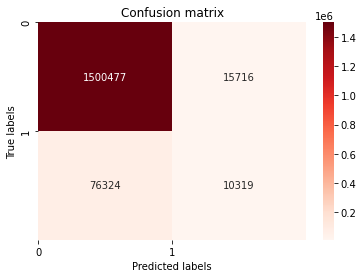


 0.942576782652748

 0.18315909050568877

               precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97   1516193
     Class 1       0.40      0.12      0.18     86643

    accuracy                           0.94   1602836
   macro avg       0.67      0.55      0.58   1602836
weighted avg       0.92      0.94      0.93   1602836



In [12]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

model = CatBoostClassifier(task_type='GPU')
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

### 02-3-2. Border + CatBoost

Learning rate set to 0.020098
0:	learn: 0.6834340	total: 63ms	remaining: 1m 2s
1:	learn: 0.6741719	total: 123ms	remaining: 1m 1s
2:	learn: 0.6654535	total: 183ms	remaining: 1m
3:	learn: 0.6573199	total: 243ms	remaining: 1m
4:	learn: 0.6493840	total: 303ms	remaining: 1m
5:	learn: 0.6423200	total: 363ms	remaining: 1m
6:	learn: 0.6352760	total: 424ms	remaining: 1m
7:	learn: 0.6289246	total: 485ms	remaining: 1m
8:	learn: 0.6225790	total: 546ms	remaining: 1m
9:	learn: 0.6162172	total: 607ms	remaining: 1m
10:	learn: 0.6105798	total: 666ms	remaining: 59.9s
11:	learn: 0.6051965	total: 726ms	remaining: 59.8s
12:	learn: 0.6002286	total: 782ms	remaining: 59.4s
13:	learn: 0.5952662	total: 840ms	remaining: 59.1s
14:	learn: 0.5900484	total: 899ms	remaining: 59s
15:	learn: 0.5856982	total: 957ms	remaining: 58.9s
16:	learn: 0.5812108	total: 1.02s	remaining: 58.9s
17:	learn: 0.5768133	total: 1.08s	remaining: 58.8s
18:	learn: 0.5729476	total: 1.14s	remaining: 58.7s
19:	learn: 0.5691499	total: 1.2s	remai

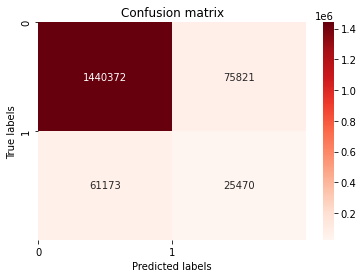


 0.9145302451404885

 0.271052603573595

               precision    recall  f1-score   support

     Class 0       0.96      0.95      0.95   1516193
     Class 1       0.25      0.29      0.27     86643

    accuracy                           0.91   1602836
   macro avg       0.61      0.62      0.61   1602836
weighted avg       0.92      0.91      0.92   1602836



In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

model = CatBoostClassifier(task_type='GPU')
model.fit(X_train_border, y_train_border)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

### 02-3-3. Adasyn + CatBoost

Learning rate set to 0.020095
0:	learn: 0.6859181	total: 58.8ms	remaining: 58.7s
1:	learn: 0.6793291	total: 117ms	remaining: 58.4s
2:	learn: 0.6728671	total: 174ms	remaining: 57.9s
3:	learn: 0.6666033	total: 231ms	remaining: 57.6s
4:	learn: 0.6606381	total: 288ms	remaining: 57.4s
5:	learn: 0.6549319	total: 345ms	remaining: 57.2s
6:	learn: 0.6497723	total: 402ms	remaining: 57s
7:	learn: 0.6448093	total: 459ms	remaining: 56.9s
8:	learn: 0.6400529	total: 516ms	remaining: 56.8s
9:	learn: 0.6352389	total: 573ms	remaining: 56.7s
10:	learn: 0.6308331	total: 630ms	remaining: 56.6s
11:	learn: 0.6263844	total: 688ms	remaining: 56.6s
12:	learn: 0.6224183	total: 744ms	remaining: 56.5s
13:	learn: 0.6186158	total: 801ms	remaining: 56.4s
14:	learn: 0.6146085	total: 858ms	remaining: 56.4s
15:	learn: 0.6107990	total: 916ms	remaining: 56.3s
16:	learn: 0.6074083	total: 973ms	remaining: 56.3s
17:	learn: 0.6038948	total: 1.03s	remaining: 56.3s
18:	learn: 0.6007591	total: 1.09s	remaining: 56.1s
19:	learn: 0

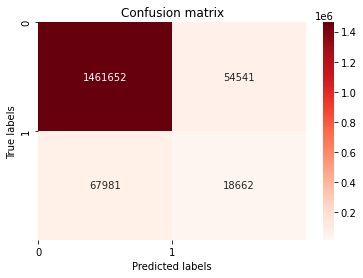


 0.9235592412448934

 0.23349974350312175

               precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96   1516193
     Class 1       0.25      0.22      0.23     86643

    accuracy                           0.92   1602836
   macro avg       0.61      0.59      0.60   1602836
weighted avg       0.92      0.92      0.92   1602836



In [15]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

model = CatBoostClassifier(task_type='GPU')
model.fit(X_train_adasyn, y_train_adasyn)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

### 02-3-4. Tomek + CatBoost

Learning rate set to 0.020101
0:	learn: 0.6854024	total: 60.7ms	remaining: 1m
1:	learn: 0.6780501	total: 120ms	remaining: 59.9s
2:	learn: 0.6711033	total: 179ms	remaining: 59.6s
3:	learn: 0.6643657	total: 239ms	remaining: 59.6s
4:	learn: 0.6578404	total: 298ms	remaining: 59.3s
5:	learn: 0.6515951	total: 356ms	remaining: 59.1s
6:	learn: 0.6460391	total: 415ms	remaining: 58.9s
7:	learn: 0.6404506	total: 474ms	remaining: 58.8s
8:	learn: 0.6350991	total: 533ms	remaining: 58.6s
9:	learn: 0.6302878	total: 593ms	remaining: 58.7s
10:	learn: 0.6252742	total: 651ms	remaining: 58.5s
11:	learn: 0.6206741	total: 708ms	remaining: 58.3s
12:	learn: 0.6162466	total: 766ms	remaining: 58.2s
13:	learn: 0.6121273	total: 826ms	remaining: 58.2s
14:	learn: 0.6078104	total: 886ms	remaining: 58.2s
15:	learn: 0.6037994	total: 945ms	remaining: 58.1s
16:	learn: 0.6000150	total: 1.01s	remaining: 58.2s
17:	learn: 0.5964700	total: 1.06s	remaining: 58.1s
18:	learn: 0.5933868	total: 1.12s	remaining: 58s
19:	learn: 0.58

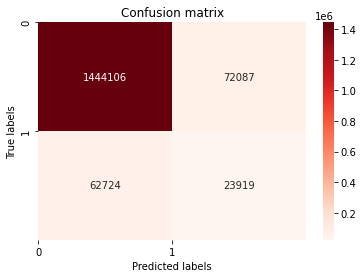


 0.9158922060647502

 0.26191219223757045

               precision    recall  f1-score   support

     Class 0       0.96      0.95      0.96   1516193
     Class 1       0.25      0.28      0.26     86643

    accuracy                           0.92   1602836
   macro avg       0.60      0.61      0.61   1602836
weighted avg       0.92      0.92      0.92   1602836



In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

model = CatBoostClassifier(task_type='GPU')
model.fit(X_train_tomek, y_train_tomek)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

### 02-3-5. ENN + CatBoost

Learning rate set to 0.02026
0:	learn: 0.6830149	total: 51.8ms	remaining: 51.8s
1:	learn: 0.6733048	total: 104ms	remaining: 52s
2:	learn: 0.6642733	total: 157ms	remaining: 52.3s
3:	learn: 0.6553347	total: 211ms	remaining: 52.5s
4:	learn: 0.6469976	total: 265ms	remaining: 52.8s
5:	learn: 0.6389993	total: 319ms	remaining: 52.9s
6:	learn: 0.6318833	total: 373ms	remaining: 53s
7:	learn: 0.6248434	total: 428ms	remaining: 53.1s
8:	learn: 0.6178486	total: 481ms	remaining: 53s
9:	learn: 0.6109142	total: 534ms	remaining: 52.9s
10:	learn: 0.6049015	total: 587ms	remaining: 52.8s
11:	learn: 0.5987560	total: 642ms	remaining: 52.9s
12:	learn: 0.5931753	total: 695ms	remaining: 52.8s
13:	learn: 0.5878117	total: 750ms	remaining: 52.8s
14:	learn: 0.5821986	total: 804ms	remaining: 52.8s
15:	learn: 0.5773138	total: 856ms	remaining: 52.7s
16:	learn: 0.5725788	total: 912ms	remaining: 52.7s
17:	learn: 0.5676626	total: 964ms	remaining: 52.6s
18:	learn: 0.5633382	total: 1.02s	remaining: 52.5s
19:	learn: 0.5589

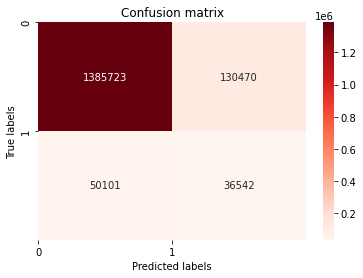


 0.8873428098695063

 0.2881236324929531

               precision    recall  f1-score   support

     Class 0       0.97      0.91      0.94   1516193
     Class 1       0.22      0.42      0.29     86643

    accuracy                           0.89   1602836
   macro avg       0.59      0.67      0.61   1602836
weighted avg       0.92      0.89      0.90   1602836



In [17]:
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

model = CatBoostClassifier(task_type='GPU')
model.fit(X_train_enn, y_train_enn)
y_pred = model.predict(X_test)

# confusion matrix
cm = (confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.title('Confusion matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
ticks = np.arange(2) #ticks : 클래스의 수 (이진분류라 2개)
plt.xticks(ticks, ticks) 
plt.yticks(ticks, ticks)
plt.show()

print('\n', accuracy_score(y_test, y_pred))
print('\n', f1_score(y_test, y_pred))
print('\n', classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

## 02-3-6. GridsearchCV

In [ ]:
model = CatBoostClassifier(task_type='GPU')

params = {'iterations': [600, 700, 800, 900, 1000],
          'depth': [4, 5, 6],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          'random_seed': [42]
         }

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

grid_search = GridSearchCV(model, params, scoring = 'f1', cv=skf, n_jobs=None)
grid_search.fit(X_train_enn,y_train_enn)
print('Best score : {}'.format(grid_search.best_score_))
print('Best Hyper Parameter : {}'.format(grid_search.best_params_))

best = grid_search.best_estimator_
y_pred = best.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print('test ACC :', accuracy_score(y_pred, y_test))
print('test roc_auc : ',roc_auc_score(y_prob,y_test))
print('test f1_score : ',f1_score(y_pred,y_test))

## 02-4. LightGBM

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective='binary', device = "gpu", metric='binary_logloss')

params = {'num_leaves':[40,60,80], 
          'min_child_samples':[5,10,15],
          'max_depth':[-1,5,10,20],
          'learning_rate':[0.05,0.1,0.2],
         }

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=2)

grid_search = GridSearchCV(model, params, scoring = 'f1', cv=skf, n_jobs=-1)
grid_search.fit(X_train_enn,y_train_enn)
print('Best score : {}'.format(grid_search.best_score_))
print('Best Hyper Parameter : {}'.format(grid_search.best_params_))

best = grid_search.best_estimator_
y_pred = best.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]
print('test ACC :', accuracy_score(y_pred, y_test))
print('test roc_auc : ',roc_auc_score(y_prob,y_test))
print('test f1_score : ',f1_score(y_pred,y_test))